In [4]:
###IMPORTS#############################################
import os, sys
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.signal import find_peaks
from sklearn.metrics import mean_squared_error
#######################################################

In [5]:
#bot_state_dir = os.getcwd() + "\\mavic_state.csv"
#bot_state_dir = os.getcwd() + "\\mavic_state2.csv"
#bot_state_dir = os.getcwd() + "\\mavic_state3.csv"
#bot_state_dir = os.getcwd() + "\\mavic_state4.csv"
bot_state_dir = os.getcwd() + "\\mavic_state7.csv"

print(bot_state_dir)
# cols = ['x_pos', 'y_pos', 'z_pos', 
#         'roll_rot', 'pitch_rot', 'yaw_rot',
#         'x_vel', 'y_vel', 'alt_vel',
#         'x_acc', 'y_acc', 'alt_acc',
#         'roll_vel', 'pitch_vel', 'yaw_vel',
#         'timestep',
#          'phi_dot', 'theta_dot', 'psi_dot',
#          'xvel_local', 'yvel_local', 'zvel_local',
#          'xdot_global', 'ydot_global', 'zdot_global',
#          'xpos_global', 'ypos_global', 'zpos_global',
#          'roll_ang', 'pitch_ang', 'yaw_ang'
#        ]

#use for mavic_state4.csv
cols = ['x_pos', 'y_pos', 'z_pos', 
        'roll_rot', 'pitch_rot', 'yaw_rot', 
        'x_vel', 'y_vel', 'alt_vel',
        'x_acc', 'y_acc', 'alt_acc',
        'roll_vel', 'pitch_vel', 'yaw_vel',
        'timestep']
#         ,
#         'front_left_motor', 'front_right_motor',
#         'rear_left_motor', 'rear_right_motor']



bot_stateDF = pd.read_csv(bot_state_dir, names=cols)
print(bot_stateDF.shape)
print(bot_stateDF)

C:\Users\ericx\OneDrive\Desktop\mine\grad_school\MARS_Lab_Swarm\Gazebo_dragonFly\webots_tutorial\hovering_test_project\python_utilities\mavic_state7.csv
(457, 16)
        x_pos         y_pos     z_pos  roll_rot  pitch_rot       yaw_rot  \
0   -0.005625 -5.900385e-08  0.115662  0.000002  -0.069871 -1.735217e-07   
1   -0.005625 -5.764667e-08  0.115662  0.000002  -0.069872 -1.718920e-07   
2   -0.005625 -5.743479e-08  0.115662  0.000002  -0.069872 -1.715229e-07   
3   -0.005625 -5.788793e-08  0.115662  0.000002  -0.069873 -1.719056e-07   
4   -0.005625 -5.869216e-08  0.115662  0.000002  -0.069873 -1.727044e-07   
..        ...           ...       ...       ...        ...           ...   
452 -0.005620 -1.241580e-07  0.115694  0.000003  -0.069793 -3.103203e-07   
453 -0.005620 -1.249494e-07  0.115695  0.000003  -0.069792 -3.127063e-07   
454 -0.005619 -1.257414e-07  0.115696  0.000003  -0.069790 -3.151100e-07   
455 -0.005619 -1.265340e-07  0.115696  0.000003  -0.069788 -3.175315e-07   
4

In [3]:
#PID_dir = os.getcwd() + "\\PID_and_inputs.csv"
#PID_dir = os.getcwd() + "\\PID_and_inputs2.csv"
#PID_dir = os.getcwd() + "\\PID_and_inputs3.csv"
PID_dir = os.getcwd() + "\\PID_and_inputs4.csv"

print(PID_dir)
# cols = ['xposPD', 'yposPD',
#         'rollPID', 'pitchPID', 'yawPID', 'throttlePID',
#         'rollDotPID', 'pitchDotPID', 'yawDotPID',
#         'roll_input', 'pitch_input', 
#         'yaw_input', 'vertical_input',
#         'diff_altitude', 'clampd_diff_altitude',
#        'front_left_motor', 'front_right_motor',
#         'rear_left_motor', 'rear_right_motor']


#use for PID_and_inputs4.csv
cols = ['xposPD', 'yposPD',
        'rollPID', 'pitchPID', 
        'yawPID', 'throttlePID',
        'roll_input', 'pitch_input', 
        'yaw_input', 'vertical_input',
        'diff_altitude', 'clampd_diff_altitude']

PIDinputsDF = pd.read_csv(PID_dir, names=cols)
print(PIDinputsDF.shape)
print(PIDinputsDF)

C:\Users\ericx\OneDrive\Desktop\mine\grad_school\MARS_Lab_Swarm\Gazebo_dragonFly\webots_tutorial\hovering_test_project\python_utilities\PID_and_inputs4.csv
(13494, 12)
         xposPD    yposPD   rollPID  pitchPID    yawPID  throttlePID  \
0      0.000079  0.000003  0.000019 -0.000039  0.000079     3.899717   
1      0.000079  0.000003  0.000019 -0.000039  0.000079     3.899717   
2      0.000079  0.000003  0.000019 -0.000039  0.000079     3.899717   
3      0.000079  0.000003  0.000019 -0.000039  0.000079     3.899717   
4      0.000079  0.000003  0.000019 -0.000039  0.000079     3.899717   
...         ...       ...       ...       ...       ...          ...   
13489 -7.044426  5.145760  3.626321  4.299991  9.022857     3.357656   
13490 -7.044426  5.145760  3.626321  4.299991  9.022857     3.357656   
13491 -7.044426  5.145760  3.626321  4.299991  9.022857     3.357656   
13492 -7.044426  5.145760  3.626321  4.299991  9.022857     3.357656   
13493 -7.044426  5.145760  3.626321  4.2

length of z-pos: 457
length of timestep: 457
z-pos max: 0.6170076628700949
zpos-error: 2.382992337129905
[0.11569409 0.11569484 0.1156956  0.11569637 0.11569714]
No. of peaks found: 0
final peak val: 0
peak_sum: 0
peak_cnt: 0
peak_avg: 500
overshoot: 497.0
adjust-time: 9999
fitness: 6.3168


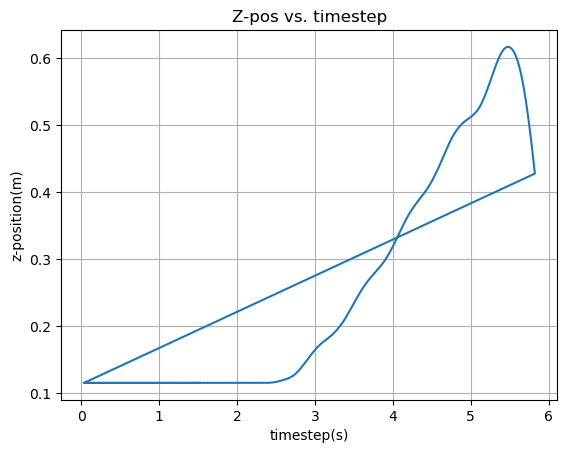

In [6]:
###Plot z-pos vs timestep
z_pos = np.array(bot_stateDF["z_pos"])
timestep = np.array(bot_stateDF["timestep"])
print("length of z-pos: {}".format(len(z_pos)))
print("length of timestep: {}".format(len(timestep)))
zpos_max = z_pos.max()
print("z-pos max: {}".format(zpos_max))
zpos_exp = float(3)
zpos_err = abs(zpos_max - zpos_exp)
print("zpos-error: {}".format(zpos_err))
print(z_pos[len(z_pos) - 5:])

##collect peaks from zpos
exp_error = 0.5
peaks, peak_props = find_peaks(z_pos, height=zpos_exp, distance=10)
print("No. of peaks found: {}".format(len(peaks)))

peak_bal_val = 0
peak_cnt = 0
peak_sum = 0
while peak_bal_val == 0 and peak_cnt < len(peaks):
    peak = peaks[peak_cnt]
    peak_val = z_pos[peak]
    peak_sum += peak_val
    print("peak-{}: {}".format(peak_cnt, peak_val))
    peak_err = peak_val - zpos_exp
    print("peak-error: {}".format(peak_err))
    if peak_err < exp_error:
        peak_sum += peak_val
        peak_bal_val = peak_val
    peak_cnt+=1
print("final peak val: {}".format(peak_bal_val))
time_indices = []
#find time at peak
for i, val in enumerate(z_pos):
    if val == peak_bal_val:
        time_indices.append(i)
        

#set condition for when peak-cnt = 0
if peak_cnt == 0:
    peak_avg = 500
else:
    peak_avg = peak_sum / peak_cnt
    
print("peak_sum: {}".format(peak_sum))
print("peak_cnt: {}".format(peak_cnt))
print("peak_avg: {}".format(peak_avg))
overshoot = abs(peak_avg - zpos_exp)
print("overshoot: {}".format(overshoot))

ovshot_exp = 0.2
adjst_time_exp = float(12)
if len(time_indices) > 0 and peak_bal_val != 0:
    adjst_time = timestep[0] * time_indices[0]
else:
    adjst_time = 9999
    
print("adjust-time: {}".format(adjst_time))
fitness = np.log10((adjst_time/adjst_time_exp) + 1) + np.log10((overshoot/ovshot_exp) + 1)
print("fitness: {:.4f}".format(fitness))



plt.plot(timestep, z_pos)
plt.title("Z-pos vs. timestep")
plt.xlabel("timestep(s)")
plt.ylabel("z-position(m)")
plt.grid()
plt.show()

In [5]:
print(z_pos)
np.save("z_pos_1p1_0p1_3.npy", z_pos)

[0.1474441  0.14238605 0.13483779 ... 2.68599847 2.66718239 2.64497401]


In [6]:
np.save("timestep.npy", timestep)

length of x-pos: 13494
length of timestep: 13494
[0.5247635  0.54953018 0.57478345 0.60070777 0.62746161]
x-pos max: 7.592814115399229
xpos-error: 0.007185884600771075
No. of peaks found: 0
peak_bal_val: 0
peak_sum: 0
peak_cnt: 0
peak_avg: 500
overshoot: 492.4
adjust-time: 9999
fitness: 5.9156


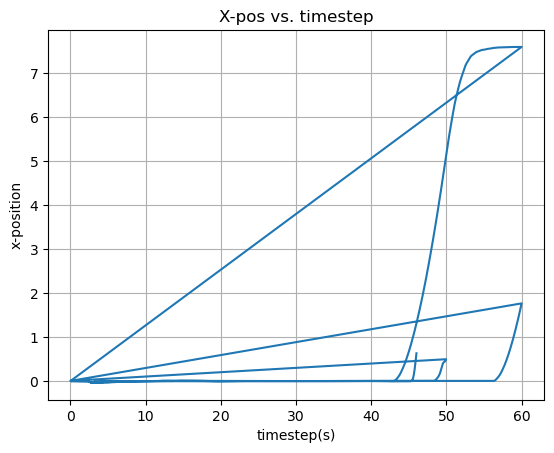

In [7]:
###Plot x-pos vs timestep
x_pos = np.array(bot_stateDF["x_pos"])
timestep = np.array(bot_stateDF["timestep"])
print("length of x-pos: {}".format(len(x_pos)))
print("length of timestep: {}".format(len(timestep)))
print(x_pos[len(x_pos) - 5:])

xpos_max = x_pos.max()
print("x-pos max: {}".format(xpos_max))
xpos_exp = 7.6
xpos_err = abs(xpos_max - xpos_exp)
print("xpos-error: {}".format(xpos_err))

##collect peaks from zpos
exp_error = 0.01

peaks, peak_props = find_peaks(x_pos, height=xpos_exp, distance=10)
print("No. of peaks found: {}".format(len(peaks)))

peak_bal_val = 0
peak_cnt = 0
peak_sum = 0
while peak_bal_val == 0 and peak_cnt < len(peaks):
    peak = peaks[peak_cnt]
    peak_val = x_pos[peak]
    peak_sum += peak_val
    print("peak-{}: {}".format(peak_cnt, peak_val))
    peak_err = peak_val - xpos_exp
    print("peak-error: {}".format(peak_err))
    if peak_err < exp_error:
        peak_sum += peak_val
        peak_bal_val = peak_val
    peak_cnt += 1
print("peak_bal_val: {}".format(peak_bal_val))
time_indices = []
#find time at peak
for i, val in enumerate(x_pos):
    if val == peak_bal_val:
        time_indices.append(i)
        

#set condition for when peak-cnt = 0
if peak_cnt == 0:
    peak_avg = 500
else:
    peak_avg = peak_sum / peak_cnt
    
print("peak_sum: {}".format(peak_sum))
print("peak_cnt: {}".format(peak_cnt))
print("peak_avg: {}".format(peak_avg))
overshoot = abs(peak_avg - xpos_exp)
print("overshoot: {}".format(overshoot))

ovshot_exp = 0.2
adjst_time_exp = float(30)
if len(time_indices) > 0 and peak_bal_val != 0:
    adjst_time = timestep[0] * time_indices[0]
else:
    adjst_time = 9999
    
print("adjust-time: {}".format(adjst_time))
fitness = np.log10((adjst_time/adjst_time_exp) + 1) + np.log10((overshoot/ovshot_exp) + 1)
print("fitness: {:.4f}".format(fitness))


plt.plot(timestep[200:], x_pos[200:])
plt.title("X-pos vs. timestep")
plt.xlabel("timestep(s)")
plt.ylabel("x-position")
plt.grid()
plt.show()

In [8]:
print("xpos-avg: {:.4f}".format(np.mean(x_pos)))

xpos-avg: 0.4069


length of y-pos: 13494
length of timestep: 13494
[-0.05547932 -0.06291247 -0.06906559 -0.07442761 -0.07969192]
y-pos max: 2.486311105711783
ypos-error: 0.013688894288216957
No. of peaks found: 0
final peak val: 0
peak_sum: 0
peak_cnt: 0
peak_avg: 500
overshoot: 497.5
adjust-time: 9999
fitness: 5.9201


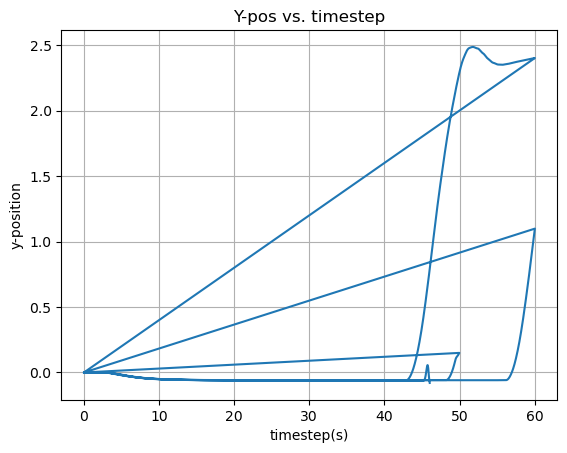

In [9]:
###Plot y-pos vs timestep
y_pos = np.array(bot_stateDF["y_pos"])
timestep = np.array(bot_stateDF["timestep"])
print("length of y-pos: {}".format(len(y_pos)))
print("length of timestep: {}".format(len(timestep)))
print(y_pos[len(y_pos) - 5:])


ypos_max = y_pos.max()
print("y-pos max: {}".format(ypos_max))
ypos_exp = 2.5
ypos_err = abs(ypos_max - ypos_exp)
print("ypos-error: {}".format(ypos_err))

##collect peaks from zpos
exp_error = 0.01

peaks, peak_props = find_peaks(y_pos, height=ypos_exp, distance=10)
print("No. of peaks found: {}".format(len(peaks)))

peak_bal_val = 0
peak_cnt = 0
peak_sum = 0
while peak_bal_val == 0 and peak_cnt < len(peaks):
    peak = peaks[peak_cnt]
    peak_val = y_pos[peak]
    peak_sum += peak_val
    print("peak-{}: {}".format(peak_cnt, peak_val))
    peak_err = peak_val - ypos_exp
    print("peak-error: {}".format(peak_err))
    if peak_err < exp_error:
        peak_sum += peak_val
        peak_bal_val = peak_val
    peak_cnt += 1
print("final peak val: {}".format(peak_bal_val))
time_indices = []
#find time at peak
for i, val in enumerate(y_pos):
    if val == peak_bal_val:
        time_indices.append(i)
        

#set condition for when peak-cnt = 0
if peak_cnt == 0:
    peak_avg = 500
else:
    peak_avg = peak_sum / peak_cnt
    
print("peak_sum: {}".format(peak_sum))
print("peak_cnt: {}".format(peak_cnt))
print("peak_avg: {}".format(peak_avg))
overshoot = abs(peak_avg - ypos_exp)
print("overshoot: {}".format(overshoot))

ovshot_exp = 0.2
adjst_time_exp = float(30)
if len(time_indices) > 0 and peak_bal_val != 0:
    adjst_time = timestep[0] * time_indices[0]
else:
    adjst_time = 9999
    
print("adjust-time: {}".format(adjst_time))
fitness = np.log10((adjst_time/adjst_time_exp) + 1) + np.log10((overshoot/ovshot_exp) + 1)
print("fitness: {:.4f}".format(fitness))




plt.plot(timestep, y_pos)
plt.title("Y-pos vs. timestep")
plt.xlabel("timestep(s)")
plt.ylabel("y-position")
plt.grid()
plt.show()

In [10]:
#return array of pitch waypts
def generatePitchWaypts(calcd_dist, calcd_timestep):
    #calculate number of waypoints
    #num_of_waypts = np.round(calcd_dist) / (self.pitch_velocity * calcd_timestep)
    num_of_waypts  = len(x_pos)
    print("num of waypts: {}".format(num_of_waypts))
    # Calculate the vector from origin to target
    x_wypt = 7.6
    y_wypt = 2.5
    delta_x = x_wypt - x_pos[0]
    delta_y = y_wypt - y_pos[0]
    # Calculate the step size for each waypoint
    if num_of_waypts > 1:
        step_x = delta_x / (num_of_waypts - 1) 
        step_y = delta_y / (num_of_waypts - 1)
    else:
        step_x = 0
        step_y = 0
    # Generate the list of waypoints
    waypoints = []
    for i in range(int(num_of_waypts)):
        x = x_pos[0] + i * step_x
        y = y_pos[1] + i * step_y
        waypoints.append((x, y))
    return waypoints

In [11]:
#display error between flight trajectory and 
#get true-trajectory distance from center
def getFlightMSE(x_true, y_true, x_traj, y_traj):
    true_dist = np.sqrt(np.square(x_true) + np.square(y_true))
    true_dist_avg = np.round(np.mean(true_dist), 4)
    print(true_dist_avg)
    true_dist = np.full(len(x_traj), true_dist_avg)
    print(true_dist)
    print(len(true_dist))
    #get flight-trajectory distance from cetner
    flgt_dist = np.sqrt(np.square(x_traj) + np.square(y_traj))
    print(flgt_dist)
    print(len(flgt_dist))
    #collect mse(true vs. flight)
    flgt_MSE = mean_squared_error(true_dist, flgt_dist)
    print("MSE: {:.4f}".format(flgt_MSE))
    return flgt_MSE

num of waypts: 13494
len of xref: 13494
len of yref: 13494
4.0003
[4.0003 4.0003 4.0003 ... 4.0003 4.0003 4.0003]
13494
[4.53875481e-05 8.21288280e-05 1.11641614e-04 ... 5.78918021e-01
 6.05300998e-01 6.32502076e-01]
13494
MSE: 15.0783


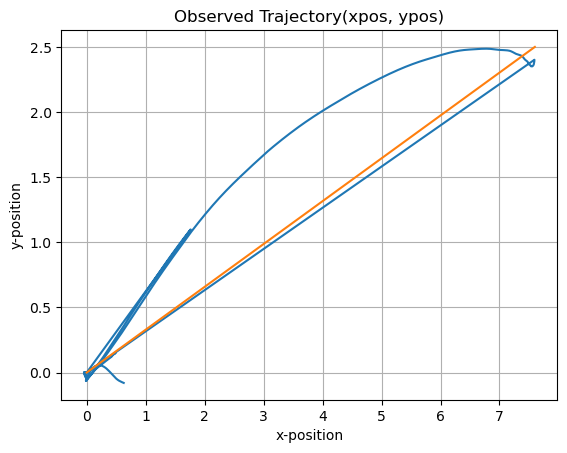

In [12]:
#plot trajectory reference path
x_wypt = 7.6
y_wypt = 2.5
calcd_dist = np.sqrt(((y_wypt - y_pos[0]) ** 2) + ((x_wypt - x_pos[0]) ** 2))
step = timestep[1] - timestep[0]
reference_path = generatePitchWaypts(calcd_dist, step)
x_ref = []
y_ref = []
for i, ref_pt in enumerate(reference_path):
    x_ref.append(ref_pt[0])
    y_ref.append(ref_pt[1])

print("len of xref: {}".format(len(x_ref)))
print("len of yref: {}".format(len(y_ref)))

trajMSE = getFlightMSE(x_ref, y_ref, x_pos, y_pos)


    
#plot trajectory for pitch chg. (xpos, ypos)
plt.plot(x_pos, y_pos)
plt.plot(x_ref, y_ref)
plt.title("Observed Trajectory(xpos, ypos)")
plt.xlabel("x-position")
plt.ylabel("y-position")
plt.grid()
plt.show()

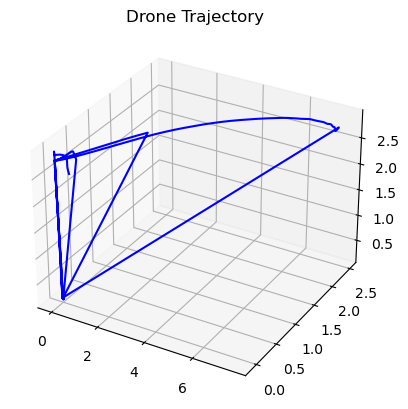

In [13]:
#plot trajectory for pitch chg. in 3D (xpos, ypos, zpos)
ax = plt.figure().add_subplot(projection='3d')
xline = x_pos
yline = y_pos
zline = z_pos

ax.plot3D(xline, yline, zline, 'blue')
ax.set_title('Drone Trajectory')
plt.show()

length of xposPID: 13494
length of timestep: 13494
[-11.97025337 -11.97025337 -11.97025337 -11.97025337 -13.13928818
 -13.13928818 -13.13928818 -13.13928818 -13.13928818 -13.13928818
 -13.13928818 -13.13928818 -13.13928818 -12.41528565 -12.41528565
 -12.41528565 -12.41528565 -12.41528565 -12.41528565 -12.41528565
 -12.41528565 -12.41528565 -12.41528565 -12.41528565 -10.87537619
 -10.87537619 -10.87537619 -10.87537619 -10.20141007 -10.20141007
 -10.20141007 -10.20141007 -10.20141007 -10.20141007 -10.20141007
 -10.20141007 -10.20141007 -10.20141007  -7.858791    -7.858791
  -7.858791    -7.858791    -7.858791    -7.04442578  -7.04442578
  -7.04442578  -7.04442578  -7.04442578  -7.04442578  -7.04442578]


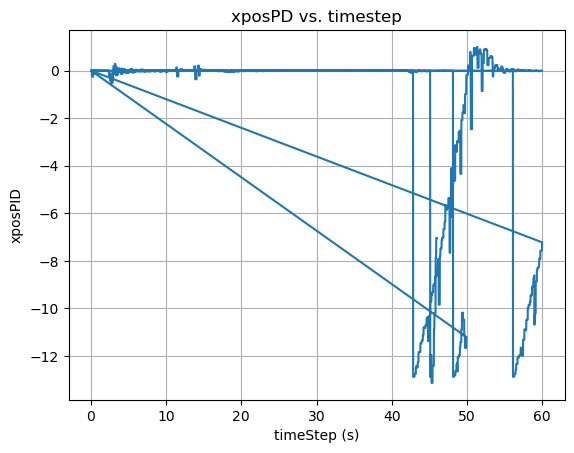

In [14]:
###Plot xposPID vs. timestep
xposPID = np.array(PIDinputsDF["xposPD"])
timestep = np.array(bot_stateDF["timestep"])
print("length of xposPID: {}".format(len(xposPID)))
print("length of timestep: {}".format(len(timestep)))
print(xposPID[len(xposPID) - 50:])

plt.plot(timestep, xposPID)
plt.title("xposPD vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("xposPID")
plt.grid()
plt.show()

length of yposPID: 13494
length of timestep: 13494


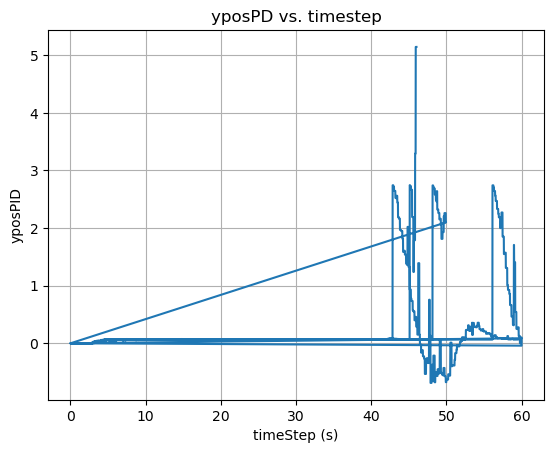

In [15]:
###Plot rollPID vs. timestep
yposPID = np.array(PIDinputsDF["yposPD"])
timestep = np.array(bot_stateDF["timestep"])
print("length of yposPID: {}".format(len(yposPID)))
print("length of timestep: {}".format(len(timestep)))

plt.plot(timestep, yposPID)
plt.title("yposPD vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("yposPID")
plt.grid()
plt.show()

length of rollPID: 13494
length of timestep: 13494
[ 0.06631208  0.06631208  0.06631208  0.06631208  0.18336384  0.18336384
  0.18336384  0.18336384  0.18336384  0.18336384  0.18336384  0.18336384
  0.18336384  0.51738811  0.51738811  0.51738811  0.51738811  0.51738811
  0.51738811  0.51738811  0.51738811  0.51738811  0.51738811  0.51738811
 -0.87696996 -0.87696996 -0.87696996 -0.87696996 -2.36567574 -2.36567574
 -2.36567574 -2.36567574 -2.36567574 -2.36567574 -2.36567574 -2.36567574
 -2.36567574 -2.36567574 -1.57087565 -1.57087565 -1.57087565 -1.57087565
 -1.57087565  3.6263212   3.6263212   3.6263212   3.6263212   3.6263212
  3.6263212   3.6263212 ]


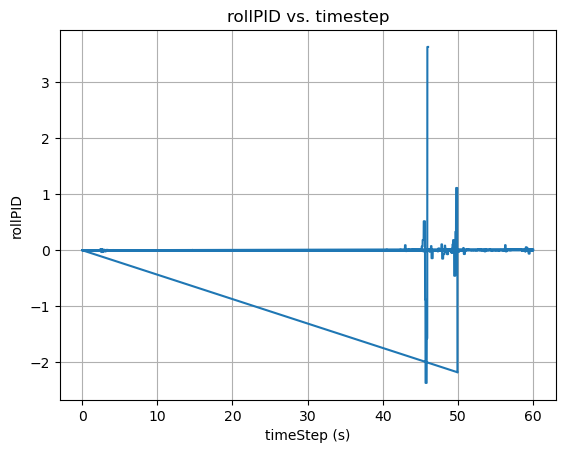

In [16]:
###Plot rollPID vs. timestep
rollPID = np.array(PIDinputsDF["rollPID"])
timestep = np.array(bot_stateDF["timestep"])
print("length of rollPID: {}".format(len(rollPID)))
print("length of timestep: {}".format(len(timestep)))
print(rollPID[len(rollPID) - 50:])

plt.plot(timestep, rollPID)
plt.title("rollPID vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("rollPID")
plt.grid()
plt.show()



length of pitchPID: 13494
length of timestep: 13494
[-0.11095967 -0.11095967 -0.11095967 -0.11095967 -0.49896091 -0.49896091
 -0.49896091 -0.49896091 -0.49896091 -0.49896091 -0.49896091 -0.49896091
 -0.49896091 -1.86286452 -1.86286452 -1.86286452 -1.86286452 -1.86286452
 -1.86286452 -1.86286452 -1.86286452 -1.86286452 -1.86286452 -1.86286452
 -3.09300614 -3.09300614 -3.09300614 -3.09300614 -0.43232169 -0.43232169
 -0.43232169 -0.43232169 -0.43232169 -0.43232169 -0.43232169 -0.43232169
 -0.43232169 -0.43232169  2.21303283  2.21303283  2.21303283  2.21303283
  2.21303283  4.2999909   4.2999909   4.2999909   4.2999909   4.2999909
  4.2999909   4.2999909 ]


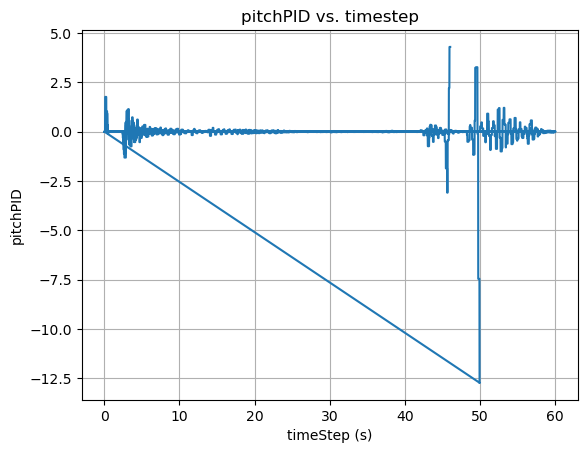

In [17]:
###Plot pitchPID vs. timestep
pitchPID = np.array(PIDinputsDF["pitchPID"])
timestep = np.array(bot_stateDF["timestep"])
print("length of pitchPID: {}".format(len(rollPID)))
print("length of timestep: {}".format(len(timestep)))
print(pitchPID[len(pitchPID) - 50:])

plt.plot(timestep, pitchPID)
plt.title("pitchPID vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("pitchPID")
plt.grid()
plt.show()

length of yawPID: 13494
length of timestep: 13494


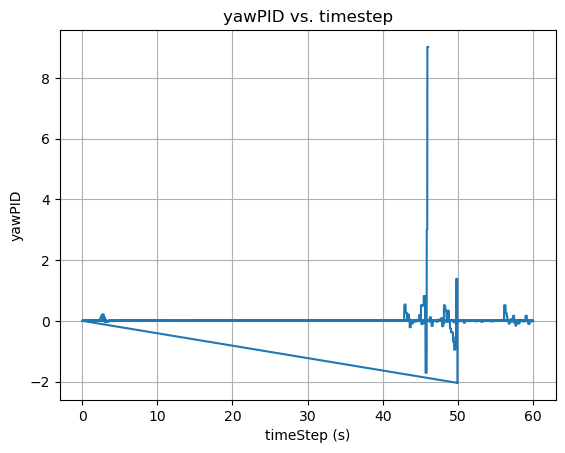

In [18]:
###Plot pitchPID vs. timestep
yawPID = np.array(PIDinputsDF["yawPID"])
timestep = np.array(bot_stateDF["timestep"])
print("length of yawPID: {}".format(len(yawPID)))
print("length of timestep: {}".format(len(timestep)))

plt.plot(timestep, yawPID)
plt.title("yawPID vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("yawPID")
plt.grid()
plt.show()

length of throttlePID: 13494
length of timestep: 13494


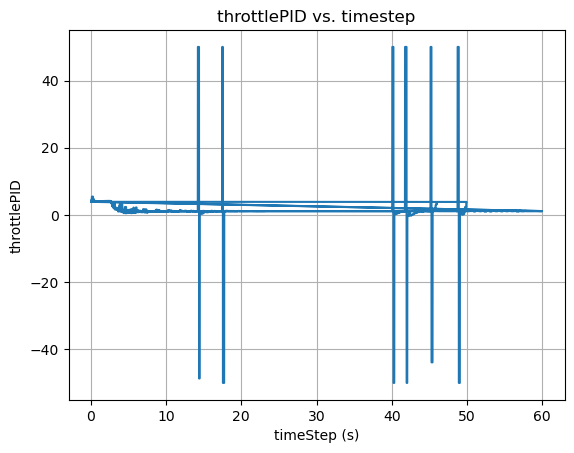

In [19]:
#plot throttlePID over time
throttlePID = np.array(PIDinputsDF["throttlePID"])
timestep = np.array(bot_stateDF["timestep"])
print("length of throttlePID: {}".format(len(throttlePID)))
print("length of timestep: {}".format(len(timestep)))

plt.plot(timestep, throttlePID)
plt.title("throttlePID vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("throttlePID")
plt.grid()
plt.show()

In [20]:
# #plot rollDotPID over time
# rollDotPID = np.array(PIDinputsDF["rollDotPID"])
# timestep = np.array(bot_stateDF["timestep"])
# print("length of rollDotPID: {}".format(len(rollDotPID)))
# print("length of timestep: {}".format(len(timestep)))

# plt.plot(timestep, rollDotPID)
# plt.title("rollDotPID vs. timestep")
# plt.xlabel("timeStep (s)")
# plt.ylabel("rollDotPID-output")
# plt.grid()
# plt.show()

In [21]:
# #plot pitchDotPID over time
# pitchDotPID = np.array(PIDinputsDF["pitchDotPID"])
# timestep = np.array(bot_stateDF["timestep"])
# print("length of pitchDotPID: {}".format(len(pitchDotPID)))
# print("length of timestep: {}".format(len(timestep)))

# plt.plot(timestep, pitchDotPID)
# plt.title("pitchDotPID vs. timestep")
# plt.xlabel("timeStep (s)")
# plt.ylabel("pitchDotPID-output")
# plt.grid()
# plt.show()

In [22]:
# #plot yawDotPID over time
# yawDotPID = np.array(PIDinputsDF["yawDotPID"])
# timestep = np.array(bot_stateDF["timestep"])
# print("length of yawDotPID: {}".format(len(yawDotPID)))
# print("length of timestep: {}".format(len(timestep)))

# plt.plot(timestep, yawDotPID)
# plt.title("yawDotPID vs. timestep")
# plt.xlabel("timeStep (s)")
# plt.ylabel("yawDotPID-output")
# plt.grid()
# plt.show()

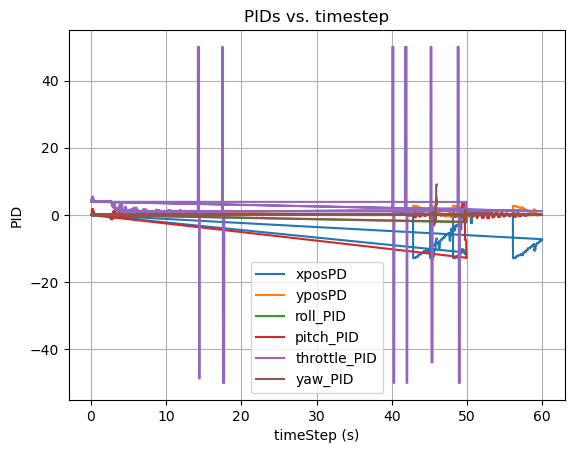

In [23]:
#plot PID ontop of each other
plt.plot(timestep, xposPID, label="xposPD")
plt.plot(timestep, yposPID, label="yposPD")
plt.plot(timestep, rollPID, label="roll_PID")
plt.plot(timestep, pitchPID, label="pitch_PID")
plt.plot(timestep, throttlePID, label="throttle_PID")
plt.plot(timestep, yawPID, label="yaw_PID")
#plt.plot(timestep, rollDotPID, label="rollDotPID")
#plt.plot(timestep, pitchDotPID, label="pitchDotPID")
#plt.plot(timestep, yawDotPID, label="yawDotPID")
plt.title("PIDs vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("PID")
plt.grid()
plt.legend()
plt.show()

In [24]:
###Plot Velocities for x, y, z

length of x-vel: 13494
length of timestep: 13494
[1.0950124  1.15005819 1.20237725 1.25147629 1.29686312 1.33806367
 1.37464541 1.40624882 1.43263395 1.45375428 1.46987469 1.48174846
 1.49085418 1.49996251 1.51113956 1.5269465  1.55073274 1.58460392
 1.6284764  1.67941578]
-0.0021258596528912752


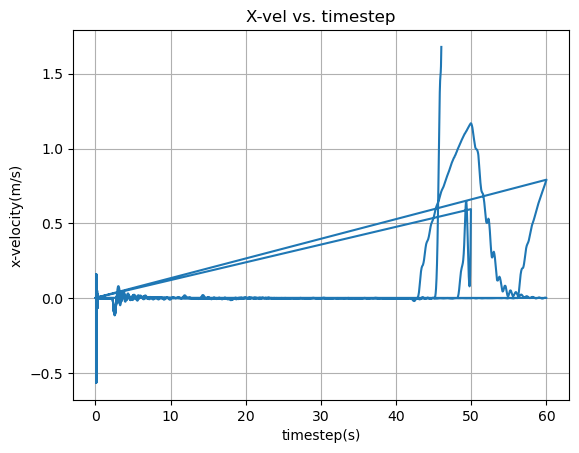

In [25]:
###Plot x-vel vs timestep
x_vel = np.array(bot_stateDF["x_vel"])
timestep = np.array(bot_stateDF["timestep"])
print("length of x-vel: {}".format(len(x_vel)))
print("length of timestep: {}".format(len(timestep)))
print(x_vel[len(x_vel) - 20:])
print(np.mean(x_vel[2400:2420]))

plt.plot(timestep, x_vel)
plt.title("X-vel vs. timestep")
plt.xlabel("timestep(s)")
plt.ylabel("x-velocity(m/s)")
plt.grid()
plt.show()

length of y-vel: 13494
length of timestep: 13494
[ 0.12295265  0.0485252  -0.03347427 -0.1219464  -0.21531075 -0.31140325
 -0.40736298 -0.49951703 -0.58328858 -0.65318339 -0.70295718 -0.72612875
 -0.71706397 -0.67516502 -0.60532132 -0.52324457 -0.44423099 -0.38578633
 -0.36299114 -0.3828645 ]


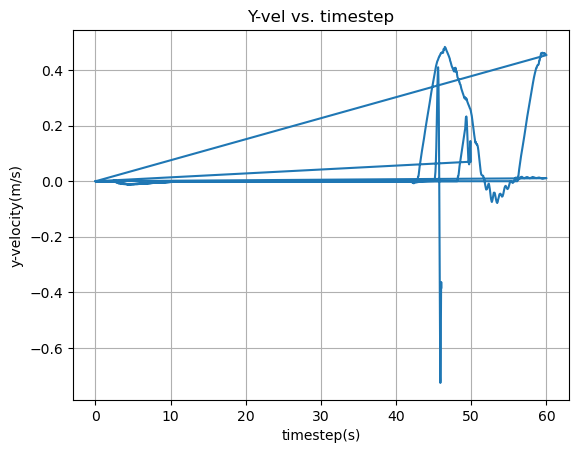

In [26]:
###Plot y-vel vs timestep
y_vel = np.array(bot_stateDF["y_vel"])
timestep = np.array(bot_stateDF["timestep"])
print("length of y-vel: {}".format(len(y_vel)))
print("length of timestep: {}".format(len(timestep)))
print(y_vel[len(y_vel) - 20:])

plt.plot(timestep, y_vel)
plt.title("Y-vel vs. timestep")
plt.xlabel("timestep(s)")
plt.ylabel("y-velocity(m/s)")
plt.grid()
plt.show()

length of alt-vel: 13494
length of timestep: 13494
zvel-min: -1.4408727952380964
[-0.3360804  -0.36427109 -0.39320562 -0.42202209 -0.4496865  -0.47500485
 -0.49669742 -0.51357064 -0.5248267  -0.530549   -0.53238377 -0.53438663
 -0.54389348 -0.57237143 -0.63177676 -0.73111815 -0.87211499 -1.04872701
 -1.24585708 -1.4408728 ]
0.00506128807928512


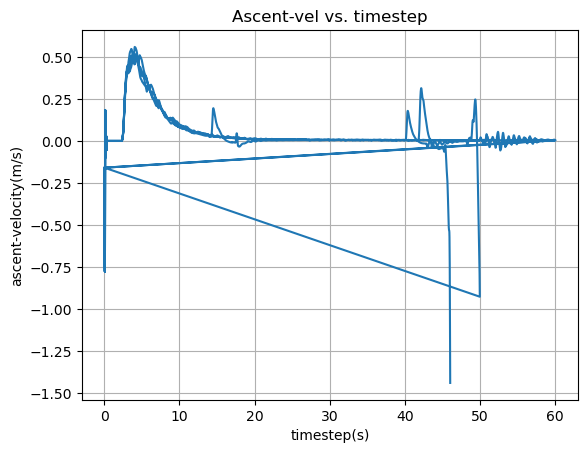

In [27]:
###Plot z-vel vs timestep
z_vel = np.array(bot_stateDF["alt_vel"])
timestep = np.array(bot_stateDF["timestep"])
print("length of alt-vel: {}".format(len(z_vel)))
print("length of timestep: {}".format(len(timestep)))
print("zvel-min: {}".format(z_vel.min()))
print(z_vel[len(z_vel) - 20:])
print(np.mean(z_vel[2400:2420]))

plt.plot(timestep, z_vel)
plt.title("Ascent-vel vs. timestep")
plt.xlabel("timestep(s)")
plt.ylabel("ascent-velocity(m/s)")
plt.grid()
plt.show()

length of x_acc: 13494
length of timestep: 13494
x_acc-min: -49.49483130764169
[-0.26780694  0.18899674  0.79515794  1.5403351   2.3905381 ]


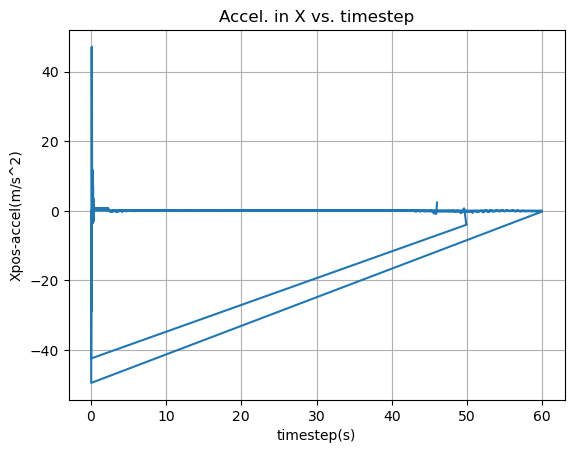

In [28]:
###Plot x-acc vs timestep
x_acc = np.array(bot_stateDF["x_acc"])
timestep = np.array(bot_stateDF["timestep"])
print("length of x_acc: {}".format(len(x_acc)))
print("length of timestep: {}".format(len(timestep)))
print("x_acc-min: {}".format(x_acc.min()))
print(x_acc[len(x_acc) - 5:])

plt.plot(timestep[200:], x_acc[200:])
plt.title("Accel. in X vs. timestep")
plt.xlabel("timestep(s)")
plt.ylabel("Xpos-accel(m/s^2)")
plt.grid()
plt.show()

length of y_acc: 13494
length of timestep: 13494
y_acc-min: -28.293263683681765
[4.09656931 3.97929548 3.83745473 3.62690037 3.30570854]


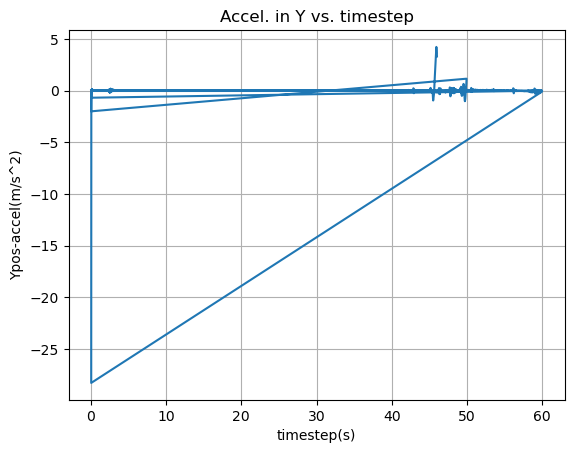

In [29]:
###Plot y-acc vs timestep
y_acc = np.array(bot_stateDF["y_acc"])
timestep = np.array(bot_stateDF["timestep"])
print("length of y_acc: {}".format(len(y_acc)))
print("length of timestep: {}".format(len(timestep)))
print("y_acc-min: {}".format(y_acc.min()))
print(y_acc[len(y_acc) - 5:])

plt.plot(timestep, y_acc)
plt.title("Accel. in Y vs. timestep")
plt.xlabel("timestep(s)")
plt.ylabel("Ypos-accel(m/s^2)")
plt.grid()
plt.show()

length of alt_acc: 13494
length of timestep: 13494
alt_acc-min: -0.8328211858656298
[ 4.83793359  3.42378139  1.9936457   0.56983561 -0.83282119]


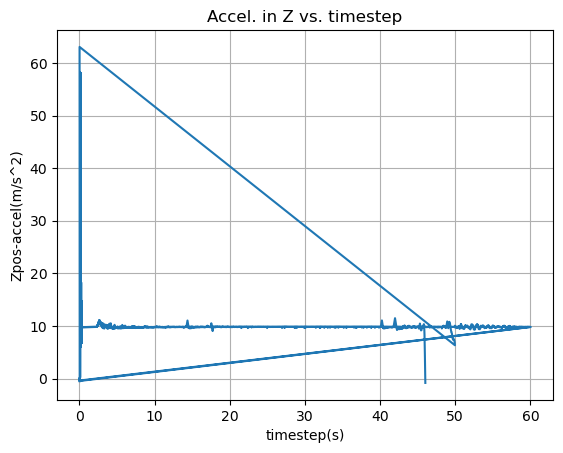

In [30]:
###Plot alt-acc vs timestep
alt_acc = np.array(bot_stateDF["alt_acc"])
timestep = np.array(bot_stateDF["timestep"])
print("length of alt_acc: {}".format(len(alt_acc)))
print("length of timestep: {}".format(len(timestep)))
print("alt_acc-min: {}".format(alt_acc.min()))
print(alt_acc[len(alt_acc) - 5:])

plt.plot(timestep, alt_acc)
plt.title("Accel. in Z vs. timestep")
plt.xlabel("timestep(s)")
plt.ylabel("Zpos-accel(m/s^2)")
plt.grid()
plt.show()

In [31]:
# #plot roll acceleration vs. timestep
# roll_vel = np.array(bot_stateDF["roll_vel"])
# timestep = np.array(bot_stateDF["timestep"])
# print("length of roll vel: {}".format(len(roll_vel)))
# print("length of timestep: {}".format(len(timestep)))
# print(roll_vel[len(roll_vel) - 20:])
# print(np.mean(roll_vel[len(roll_vel) - 20:]))

# plt.plot(timestep, roll_vel)
# plt.title("roll_vel vs. timestep")
# plt.xlabel("timeStep (s)")
# plt.ylabel("roll_vel")
# plt.grid()
# plt.show()

In [32]:
# #plot roll_dot (euler-rate from XYZ rotation with body-angular rates) vs. timestep
# roll_dot = np.array(bot_stateDF["phi_dot"])
# timestep = np.array(bot_stateDF["timestep"])
# print("length of roll dot: {}".format(len(roll_dot)))
# print("length of timestep: {}".format(len(timestep)))
# print(roll_dot[len(roll_dot) - 20:])
# print(np.mean(roll_dot[len(roll_dot) - 20:]))

# plt.plot(timestep[400:], roll_dot[400:])
# plt.title("roll_dot vs. timestep")
# plt.xlabel("timeStep (s)")
# plt.ylabel("roll_dot(rad/s in global-frame)")
# plt.grid()
# plt.show()

In [33]:
# #plot pitch acceleration vs. timestep
# pitch_vel = np.array(bot_stateDF["pitch_vel"])
# timestep = np.array(bot_stateDF["timestep"])
# print("length of pitch vel: {}".format(len(pitch_vel)))
# print("length of timestep: {}".format(len(timestep)))
# print(pitch_vel[len(pitch_vel) - 20:])
# print(np.mean(pitch_vel[len(pitch_vel) - 20:]))

# plt.plot(timestep, pitch_vel)
# plt.title("pitch_vel vs. timestep")
# plt.xlabel("timeStep (s)")
# plt.ylabel("pitch_vel")
# plt.grid()
# plt.show()

In [34]:
# #plot pitch_dot (euler-rate from XYZ rotation with body-angular rates) vs. timestep
# pitch_dot = np.array(bot_stateDF["theta_dot"])
# timestep = np.array(bot_stateDF["timestep"])
# print("length of pitch dot: {}".format(len(pitch_dot)))
# print("length of timestep: {}".format(len(timestep)))
# print(pitch_dot[len(pitch_dot) - 20:])
# print(np.mean(pitch_dot[len(pitch_dot) - 20:]))

# plt.plot(timestep, pitch_dot)
# plt.title("pitch_dot vs. timestep")
# plt.xlabel("timeStep (s)")
# plt.ylabel("pitch_dot(rad/s in global-frame)")
# plt.grid()
# plt.show()

length of pitch vel: 13494
length of timestep: 13494
[ 5.38508492e-01  5.34162966e-01  5.25314735e-01  5.09129576e-01
  4.82000633e-01  4.39593621e-01  3.76854852e-01  2.87969547e-01
  1.66268484e-01  4.09762090e-03 -2.07310746e-01 -4.77893558e-01
 -8.18623367e-01 -1.23338106e+00 -1.72026349e+00 -2.27527980e+00
 -2.89102303e+00 -3.55191584e+00 -4.23282575e+00 -4.89869746e+00]
-0.9221656783639125


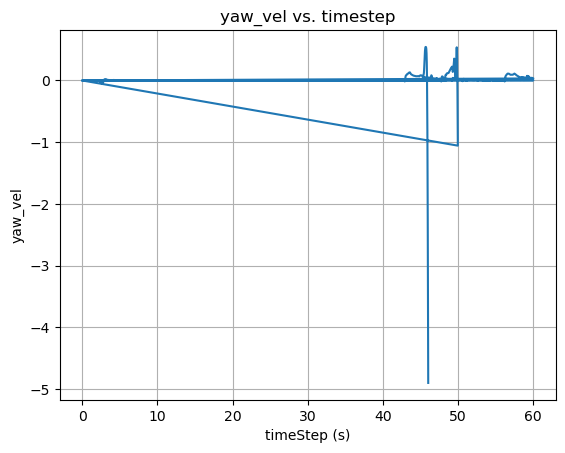

In [35]:
#plot yaw acceleration vs. timestep
yaw_vel = np.array(bot_stateDF["yaw_vel"])
timestep = np.array(bot_stateDF["timestep"])
print("length of pitch vel: {}".format(len(yaw_vel)))
print("length of timestep: {}".format(len(timestep)))
print(yaw_vel[len(yaw_vel) - 20:])
print(np.mean(yaw_vel[len(yaw_vel) - 20:]))

plt.plot(timestep, yaw_vel)
plt.title("yaw_vel vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("yaw_vel")
plt.grid()
plt.show()

In [36]:
# #plot yaw_dot (euler-rate from XYZ rotation with body-angular rates) vs. timestep
# yaw_dot = np.array(bot_stateDF["psi_dot"])
# timestep = np.array(bot_stateDF["timestep"])
# print("length of yaw dot: {}".format(len(yaw_dot)))
# print("length of timestep: {}".format(len(timestep)))
# print(yaw_dot[len(yaw_dot) - 20:])
# print(np.mean(yaw_dot[len(yaw_dot) - 20:]))

# plt.plot(timestep, yaw_dot)
# plt.title("yaw_dot vs. timestep")
# plt.xlabel("timeStep (s)")
# plt.ylabel("yaw_dot(rad/s in global-frame)")
# plt.grid()
# plt.show()

In [37]:
# roll_integ_a = integrate.simpson(roll_vel[2805:2845], timestep[2805:2845])
# roll_integ_b = integrate.simpson(roll_vel[2805:2845], dx=0.016)
# print(len(roll_vel[2805:2845]))
# print("roll-vel(p) integrated over 40-timesteps: {} rads".format(roll_integ_a))
# print("roll-vel(p) integrated using dx @ 0.016s: {} rads".format(roll_integ_b))


# roll_integ_angl = np.multiply((float(180)/math.pi), roll_integ_a)
# print("integrated roll angle: {:.6f} deg".format(roll_integ_angl))


In [38]:
# pitch_integ_a = integrate.simpson(pitch_vel[2400:2420], timestep[2400:2420])
# pitch_integ_b = integrate.simpson(pitch_vel[2400:2420], dx=0.016)
# print(len(pitch_vel[2400:2420]))
# print("pitch-vel(q) integrated over 20-timesteps: {} rads".format(pitch_integ_a))
# print("pitch-vel(q) integrated using dx @ 0.016s: {} rads".format(pitch_integ_b))


# pitch_integ_angl = np.multiply((float(180)/math.pi), pitch_integ_a)
# print("integrated pitch angle: {:.6f} deg".format(pitch_integ_angl))

In [39]:
# yaw_integ_a = integrate.simpson(yaw_vel[2400:2420], timestep[2400:2420])
# yaw_integ_b = integrate.simpson(yaw_vel[2400:2420], dx=0.016)
# print(len(yaw_vel[2400:2420]))
# print("yaw-vel(r) integrated over 20-timesteps: {} rads".format(yaw_integ_a))
# print("yaw-vel(r) integrated using dx @ 0.016s: {} rads".format(yaw_integ_b))


# yaw_integ_angl = np.multiply((float(180)/math.pi), yaw_integ_a)
# print("integrated yaw angle: {:.6f} deg".format(yaw_integ_angl))

In [40]:
def getLocalToGlobalRotation(roll_ang, pitch_ang, yaw_ang):
    
    rot_matrix = np.array([[np.cos(roll_ang)*np.cos(yaw_ang),
                            (np.sin(roll_ang)*np.sin(pitch_ang)*np.cos(yaw_ang))-(np.cos(roll_ang)*np.sin(yaw_ang)),
                            (np.cos(roll_ang)*np.sin(pitch_ang)*np.cos(yaw_ang))+(np.sin(roll_ang)*np.sin(yaw_ang))],
                          [np.sin(yaw_ang)*np.cos(pitch_ang),
                           (np.sin(roll_ang)*np.sin(pitch_ang)*np.sin(yaw_ang))+(np.cos(roll_ang)*np.cos(yaw_ang)),
                           (np.cos(roll_ang)*np.sin(pitch_ang)*np.sin(yaw_ang))-(np.sin(roll_ang)*np.cos(yaw_ang))],
                          [-np.sin(pitch_ang),
                           np.sin(roll_ang)*np.cos(pitch_ang),
                           np.cos(roll_ang)*np.cos(pitch_ang)]])
    
    return rot_matrix

In [41]:
# l2g_matrix = getLocalToGlobalRotation(roll_integ_a, pitch_integ_a, yaw_integ_a)
# print("rotated matrix shape: {}".format(l2g_matrix.shape))
# print(l2g_matrix)

In [42]:
def getEulerKinematicEqs(roll_ang, pitch_ang):
    euler_kin_matrix = np.array([[1, (np.sin(roll_ang)*np.tan(pitch_ang)), (np.cos(roll_ang)*np.tan(pitch_ang))],
                                 [0, np.cos(roll_ang), -np.sin(roll_ang)],
                                 [0, ((float(1)/np.cos(pitch_ang))*np.sin(roll_ang)), ((float(1)/np.cos(pitch_ang))*np.cos(roll_ang))]])
    
    return euler_kin_matrix

In [43]:
# euler_kin_matrix = getEulerKinematicEqs(roll_integ_a, pitch_integ_a)
# print("euler_kin_matrix:\n{}".format(euler_kin_matrix))

In [44]:
# ang_vel_local = np.array([roll_vel[2420], pitch_vel[2420], yaw_vel[2420]])
# print("using local vel. vector: {}".format(ang_vel_local))

In [45]:
# euler_time_deriv = np.matmul(euler_kin_matrix, ang_vel_local)
# print(euler_time_deriv)

In [46]:
# #x-vel from body and integrated over 40-samples of x-acceleration
# x_vel_loc = integrate.simpson(x_acc[2400:2440], timestep[2400:2440])
# print(len(x_acc[2400:2440]))
# print("x-vel local fm integrated x-acc: {:.5f} m/s".format(x_vel_loc))
# print("x-vel in global-frame from GPS: {:.5f} m/s".format(np.mean(x_vel[2400:2440])))

In [47]:
# #y-vel from body and integrated over 40-samples of y-acceleration
# y_vel_loc = integrate.simpson(y_acc[2400:2440], timestep[2400:2440])
# print(len(y_acc[2400:2440]))
# print("y-vel local fm integrated y-acc: {:.5f} m/s".format(y_vel_loc))
# print("y-vel in global-frame from GPS: {:.5f} m/s".format(np.mean(y_vel[2400:2440])))

In [48]:
# #z-vel from body and integrated over 40-samples of z-acceleration
# z_vel_loc = integrate.simpson(np.subtract(alt_acc[2400:2440], 9.81), timestep[2400:2440])
# print(len(alt_acc[2400:2440]))
# print("z-vel local fm integrated alt-acc: {:.5f} m/s".format(z_vel_loc))
# print("z-vel in global-frame from GPS: {:.5f} m/s".format(np.mean(z_vel[2400:2440])))

In [49]:
# local_vel_matrix = np.array([x_vel_loc, y_vel_loc, z_vel_loc])
# print("local vel_matrix shape: {}".format(local_vel_matrix.shape))
# print(local_vel_matrix)

In [50]:
# global_vel_matrix = np.matmul(l2g_matrix, local_vel_matrix)
# print("global_vel_matrix shape: {}".format(global_vel_matrix.shape))
# print(global_vel_matrix)

In [51]:
# gps_reading = np.array([np.mean(x_vel[2400:2440]), 
#                         np.mean(y_vel[2400:2440]), 
#                         np.mean(z_vel[2400:2440])])
# print("derived velocity from accel: {}".format(global_vel_matrix))
# print("measured mean-vel from GPS: {}".format(gps_reading))

In [52]:
def getLoc2GlobalEulerRates(roll_ang, pitch_ang, yaw_ang):
    
    rot_matrix = np.array([[1, np.sin(roll_ang)*np.tan(pitch_ang), np.cos(roll_ang)*np.tan(pitch_ang)],
                           [0, np.cos(roll_ang), -np.sin(roll_ang)],
                           [0, (np.sin(roll_ang)/np.cos(pitch_ang)), (np.cos(roll_ang)/np.cos(pitch_ang))]])
    
    return rot_matrix

In [53]:
# rate_rot_matrix = getLoc2GlobalEulerRates(roll_integ_a, pitch_integ_a, yaw_integ_a)
# print(rate_rot_matrix)
# ang_rates_bod = np.array([roll_vel[2420], pitch_vel[2420], yaw_vel[2420]])
# euler_rates = np.matmul(rate_rot_matrix, ang_rates_bod)
# print(euler_rates.shape)
# print(euler_rates)

length of roll input: 13494
length of timestep: 13494
[ 6.30515445e-02  6.27380309e-02  6.28262507e-02  6.29323796e-02
  6.30500112e-02  6.31703648e-02  6.32843087e-02  6.33840255e-02
  6.34640373e-02  6.35215313e-02  6.35561260e-02  6.29993201e-02
  6.31459982e-02  6.32816645e-02  6.33830905e-02  6.34407090e-02
  6.31689885e-02  6.34057237e-02  6.35847052e-02  6.36701574e-02
  6.36587187e-02  6.35708856e-02  6.34392354e-02  6.32972768e-02
  6.31714552e-02  6.30772718e-02  6.26496520e-02  6.29905535e-02
  6.32955601e-02  6.34852709e-02  6.37745646e-02  6.36004574e-02
  6.33547590e-02  6.31082370e-02  6.29125555e-02  6.27936754e-02
  6.27534541e-02  6.27765249e-02  6.28391700e-02  6.29174123e-02
  6.22319437e-02  4.33992259e-02  2.54013943e-02  9.49749030e-01
  8.35415591e-01  5.63045149e-01  1.30361924e-01 -1.55978299e-01
 -5.38535628e-01 -9.53636161e-01 -1.40143035e+00 -1.88210457e+00
 -2.39588965e+00 -2.94307036e+00 -3.40694439e+00 -4.02149492e+00
 -4.66993419e+00 -5.35262124e+00 -6.

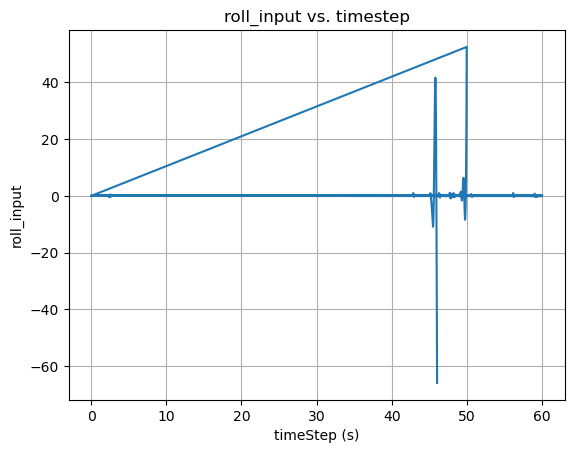

In [54]:
#plot roll-input vs. timestep
roll_input = np.array(PIDinputsDF["roll_input"])
timestep = np.array(bot_stateDF["timestep"])
print("length of roll input: {}".format(len(roll_input)))
print("length of timestep: {}".format(len(timestep)))
print(roll_input[len(roll_input) - 100:])

plt.plot(timestep, roll_input)
plt.title("roll_input vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("roll_input")
plt.grid()
plt.show()

length of pitch input: 13494
length of timestep: 13494
[-1.27707928e-01 -1.49892537e-01 -1.64063024e-01 -1.70350363e-01
 -1.69200792e-01 -6.52603666e-02 -6.38593161e-02 -6.01246173e-02
 -5.44211956e-02 -4.71635953e-02 -3.87945703e-02 -2.09850751e-01
 -1.77456991e-01 -1.40778294e-01 -1.01732745e-01 -6.21647253e-02
 -2.37741468e-02  1.19416102e-02  4.37320518e-02  7.06235760e-02
  9.19351653e-02  1.07280412e-01  1.16557036e-01 -1.84540419e-02
 -2.82255513e-03  1.13095535e-02  2.34868960e-02  3.33766842e-02
  4.07718790e-02  4.55885180e-02  4.78581331e-02  4.77160117e-02
  4.53861649e-02  4.11639308e-02  3.53971567e-02  1.40982067e-01
  1.18756370e-01  9.33627924e-02  6.61531291e-02  3.84327598e-02
  1.14096887e-02  1.37374454e-01  9.52540215e-02  5.27526800e-02
  1.16884940e-02 -2.63454924e-02 -6.00282371e-02 -8.83412661e-02
 -1.10583799e-01 -1.26373232e-01 -1.35632294e-01 -1.38564617e-01
 -1.35620770e-01 -8.49079130e-02 -7.78277577e-02 -6.83255355e-02
 -5.70201279e-02 -4.45500407e-02 -3

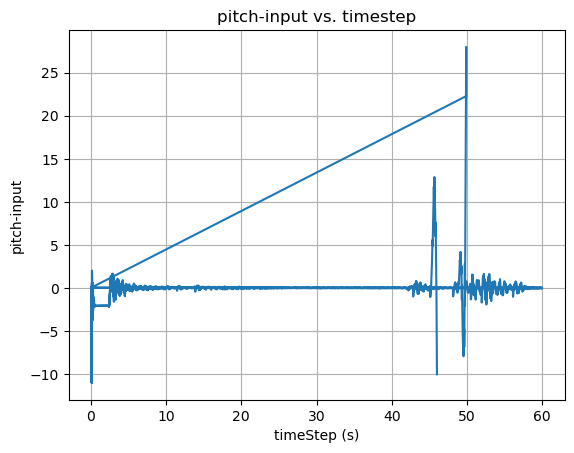

In [55]:
#plot pitch-input vs. timestep
pitch_input = np.array(PIDinputsDF["pitch_input"])
timestep = np.array(bot_stateDF["timestep"])
print("length of pitch input: {}".format(len(pitch_input)))
print("length of timestep: {}".format(len(timestep)))
print(pitch_input[len(pitch_input) - 200:])

plt.plot(timestep, pitch_input)
plt.title("pitch-input vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("pitch-input")
plt.grid()
plt.show()

length of vertical input: 13494
length of timestep: 13494
[3.89971748 3.89971748 3.89971748 3.89971748 3.89971748 3.89971748
 3.89971748 3.89971748 4.73149969 4.73149969 4.73149969 4.73149969
 4.73149969 4.73149969 4.07844101 4.07844101 4.07844101 4.07844101
 4.07844101 4.07844101]


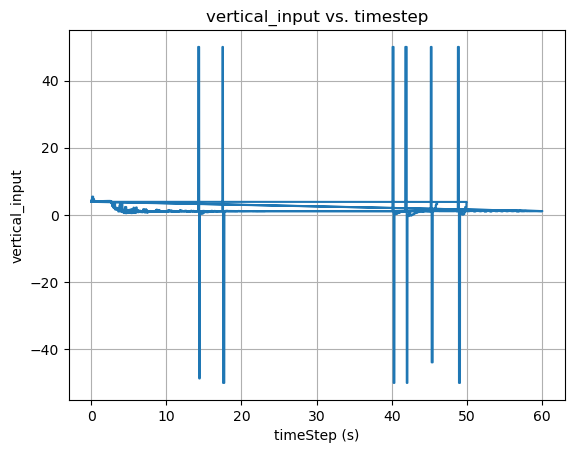

In [56]:
#plot vertical-input vs. timestep
vertical_input = np.array(PIDinputsDF["vertical_input"])
timestep = np.array(bot_stateDF["timestep"])
print("length of vertical input: {}".format(len(vertical_input)))
print("length of timestep: {}".format(len(timestep)))
print(vertical_input[:20])

plt.plot(timestep, vertical_input)
plt.title("vertical_input vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("vertical_input")
plt.grid()
plt.show()

length of vertical input: 13494
length of timestep: 13494


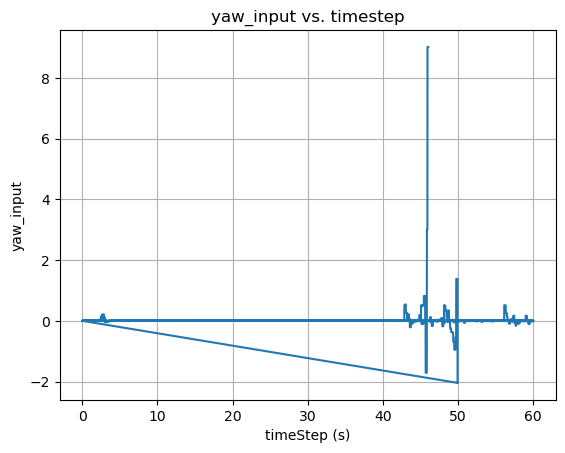

In [57]:
#plot yaw-input vs. timestep
yaw_input = np.array(PIDinputsDF["yaw_input"])
timestep = np.array(bot_stateDF["timestep"])
print("length of vertical input: {}".format(len(yaw_input)))
print("length of timestep: {}".format(len(timestep)))

plt.plot(timestep, yaw_input)
plt.title("yaw_input vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("yaw_input")
plt.grid()
plt.show()

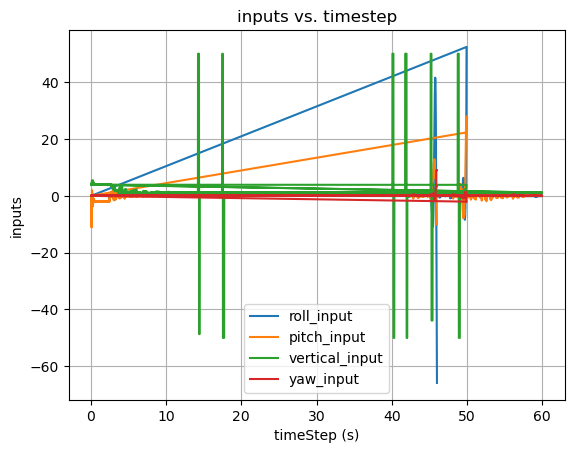

In [58]:
#plot inputs ontop of each other
plt.plot(timestep, roll_input, label="roll_input")
plt.plot(timestep, pitch_input, label="pitch_input")
plt.plot(timestep, vertical_input, label="vertical_input")
plt.plot(timestep, yaw_input, label="yaw_input")
plt.title("inputs vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("inputs")
plt.grid()
plt.legend()
plt.show()

length of yaw-rot: 13494
length of timestep: 13494
yaw-rot max: 0.5588796906728911
yaw-error: 0.2304796906728911
[-0.25326716 -0.27300383 -0.28173382 -0.27578929 -0.25149156]
No. of peaks found: 14
{'peak_heights': array([0.32893102, 0.33182759, 0.33160011, 0.33194806, 0.33309179,
       0.33345859, 0.33402132, 0.33441305, 0.33456401, 0.3346225 ,
       0.33493167, 0.33499488, 0.33502333, 0.55887969])}
peak-0: 0.3289
peak-1: 0.3318
peak-2: 0.3316
peak-3: 0.3319
peak-4: 0.3331
peak-5: 0.3335
peak-6: 0.3340
peak-7: 0.3344
peak-8: 0.3346
peak-9: 0.3346
peak-10: 0.3349
peak-11: 0.3350
peak-12: 0.3350
peak-13: 0.5589
peak-0: 0.3289310154345453
peak-error: 0.0005310154345452567
final peak val: 0.3289310154345453
peak_sum: 0.6578620308690906
peak_cnt: 1
peak_avg: 0.6578620308690906
overshoot: 0.32946203086909054
adjust-time: 105.184
fitness: 3.2684


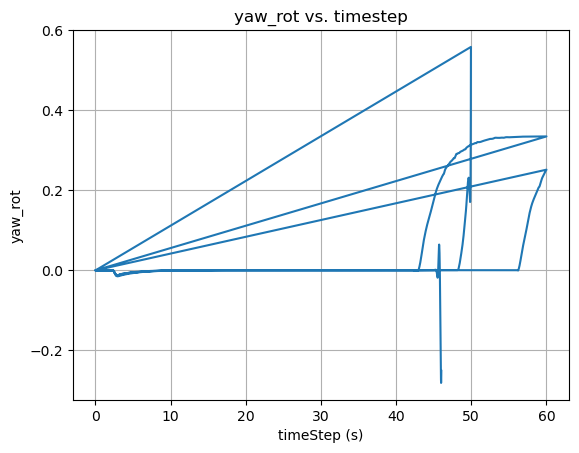

length of yaw_angle: 13494


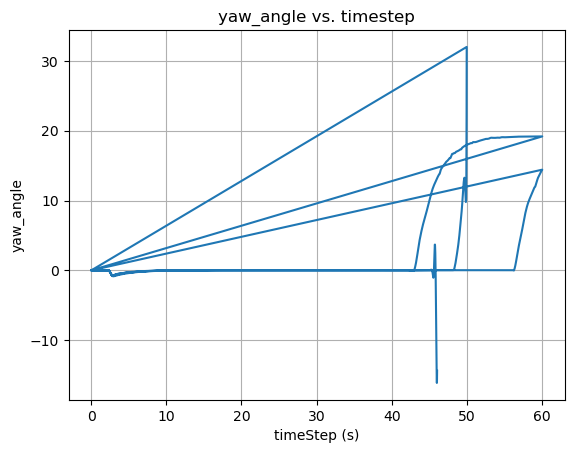

In [59]:
###plot yaw-rot over time
yaw_rot = np.array(bot_stateDF["yaw_rot"])
timestep = np.array(bot_stateDF["timestep"])
print("length of yaw-rot: {}".format(len(yaw_rot)))
print("length of timestep: {}".format(len(timestep)))
yaw_max = yaw_rot.max()
print("yaw-rot max: {}".format(yaw_max))
yaw_exp = 0.3284
yaw_err = abs(yaw_max - yaw_exp)
print("yaw-error: {}".format(yaw_err))
print(yaw_rot[len(yaw_rot) - 5:])

#collect peaks from yaw
exp_error = 0.01
peaks, peak_props = find_peaks(yaw_rot, height=yaw_exp, distance=10)
print("No. of peaks found: {}".format(len(peaks)))
print(peak_props)

for i, peak in enumerate(peaks):
    print("peak-{}: {:.4f}".format(i, yaw_rot[peak]))

peak_bal_val = 0
peak_cnt = 0
peak_sum = 0
while peak_bal_val == 0 and peak_cnt < len(peaks):
    peak = peaks[peak_cnt]
    peak_val = yaw_rot[peak]
    peak_sum += peak_val
    print("peak-{}: {}".format(peak_cnt, peak_val))
    peak_err = abs(peak_val - yaw_exp)
    print("peak-error: {}".format(peak_err))
    if peak_err < exp_error:
        peak_sum += peak_val
        peak_bal_val = peak_val
    peak_cnt += 1
print("final peak val: {}".format(peak_bal_val))
time_indices = []
for i, val in enumerate(yaw_rot):
    if val == peak_bal_val:
        time_indices.append(i)

#set condition for when peak-cnt = 0 or no peak detected
if peak_cnt == 0:
    peak_avg = 500
else:
    peak_avg = peak_sum / peak_cnt

print("peak_sum: {}".format(peak_sum))
print("peak_cnt: {}".format(peak_cnt))
print("peak_avg: {}".format(peak_avg))
overshoot = abs(peak_avg - yaw_exp)
print("overshoot: {}".format(overshoot))

ovshot_exp = 0.02
adjst_time_exp = 1.0
if len(time_indices) > 0 and peak_bal_val != 0:
    adjst_time = timestep[0] * time_indices[0]
else:
    adjst_time = 9999
    
print("adjust-time: {}".format(adjst_time))
fitness = np.log10((adjst_time/adjst_time_exp) + 1) + np.log10((overshoot/ovshot_exp) + 1)
print("fitness: {:.4f}".format(fitness))
    
plt.plot(timestep, yaw_rot)
plt.title("yaw_rot vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("yaw_rot")
plt.grid()
plt.show()


yaw_angle = np.multiply((float(180)/math.pi), yaw_rot)
print("length of yaw_angle: {}".format(len(yaw_angle)))
plt.plot(timestep, yaw_angle)
plt.title("yaw_angle vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("yaw_angle")
plt.grid()
plt.show()

length of roll-rot: 13494
length of timestep: 13494
average of roll-rot: -9.664552193838132e-05
[-0.26306381 -0.52179592 -0.8046582  -1.11187215 -1.44478088]
[-3.44801826e-05 -7.99734720e-05 -1.27552367e-04 -1.71299297e-04
 -2.07287165e-04 -1.88741630e-04]
roll-rot max: 0.9179206260573212
roll-error: 0.9169206260573212
No. of peaks found: 48
peak-0: 0.0066734224567397
peak-error: 0.0056734224567397
peak-1: 0.0051478579335443
peak-error: 0.0041478579335443
peak-2: 0.0042681330720358
peak-error: 0.0032681330720358004
peak-3: 0.0014042604046486
peak-error: 0.00040426040464860004
final peak val: 0.0014042604046486
size of time_indices: 1
peak_sum: 0.018897934271617
peak_cnt: 4
peak_avg: 0.00472448356790425
overshoot: 0.0037244835679042503
adjust-time: 6.272
fitness: 0.6827


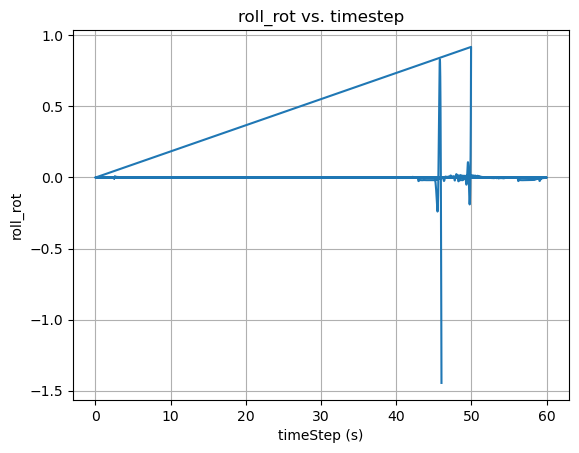

In [60]:
###plot roll-rot over time
roll_rot = np.array(bot_stateDF["roll_rot"])
timestep = np.array(bot_stateDF["timestep"])
print("length of roll-rot: {}".format(len(roll_rot)))
print("length of timestep: {}".format(len(timestep)))
print("average of roll-rot: {}".format(np.mean(roll_rot)))
print(roll_rot[len(roll_rot) - 5:])
print(roll_rot[:6])
roll_max = roll_rot.max()
print("roll-rot max: {}".format(roll_max))
roll_exp = 0.001
roll_err = abs(roll_max - roll_exp)
print("roll-error: {}".format(roll_err))


#collect peaks from yaw
exp_error = 0.001
peaks, peak_props = find_peaks(roll_rot, height=roll_exp, distance=10)
print("No. of peaks found: {}".format(len(peaks)))
#print(peak_props)

#for i, peak in enumerate(peaks):
#    print("peak-{}: {:.4f}".format(i, roll_rot[peak]))

peak_bal_val = 0
peak_cnt = 0
peak_sum = 0
while peak_bal_val == 0 and peak_cnt < len(peaks):
    peak = peaks[peak_cnt]
    peak_val = roll_rot[peak]
    peak_sum += peak_val
    print("peak-{}: {}".format(peak_cnt, peak_val))
    peak_err = abs(peak_val - roll_exp)
    print("peak-error: {}".format(peak_err))
    if peak_err < exp_error:
        peak_sum += peak_val
        peak_bal_val = peak_val
    peak_cnt += 1
print("final peak val: {}".format(peak_bal_val))
time_indices = []
for i, val in enumerate(roll_rot):
    if val == peak_bal_val:
        time_indices.append(i)
print("size of time_indices: {}".format(len(time_indices)))
        
#set condition for when peak-cnt = 0 or no peak detected
if peak_cnt == 0:
    peak_avg = 500
else:
    peak_avg = peak_sum / peak_cnt

print("peak_sum: {}".format(peak_sum))
print("peak_cnt: {}".format(peak_cnt))
print("peak_avg: {}".format(peak_avg))
overshoot = abs(peak_avg - roll_exp)
print("overshoot: {}".format(overshoot))

ovshot_exp = 0.01
adjst_time_exp = 2.5
if len(time_indices) > 0 and peak_bal_val != 0:
    adjst_time = timestep[0] * time_indices[0]
else:
    adjst_time = 9999
    
print("adjust-time: {}".format(adjst_time))
fitness = np.log10((adjst_time/adjst_time_exp) + 1) + np.log10((overshoot/ovshot_exp) + 1)
print("fitness: {:.4f}".format(fitness))



plt.plot(timestep, roll_rot)
plt.title("roll_rot vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("roll_rot")
plt.grid()
plt.show()


num of trials: 5


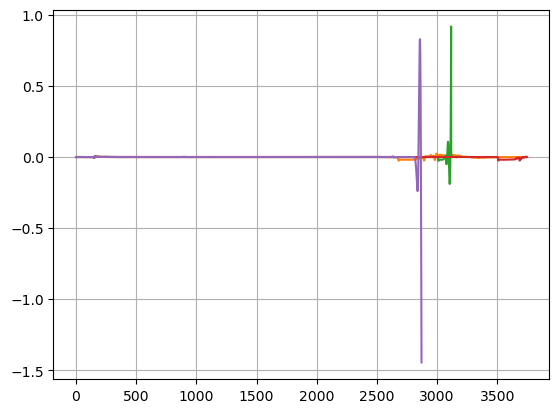

In [61]:
trials_list = []
start_time = 0.064
i = 0
while i < len(timestep):
    roll_trial = []
    if timestep[i] == start_time:
        roll_trial.clear()
        roll_trial.append(roll_rot[i])
        i += 1
    elif timestep[i] != start_time:
        j = i
        if j < len(timestep):
            while timestep[j] != start_time:
                roll_trial.append(roll_rot[j])
                j += 1
                if j > len(timestep) - 1:
                    break
            i = j
            trials_list.append(roll_trial)
        else:
            print("end of arr")
    
print("num of trials: {}".format(len(trials_list)))
for trial in trials_list:
    plt.plot(range(0, len(trial)), trial)
plt.grid()
plt.show()



In [62]:
roll_exp = 0.2
overshoot_avg =  []
for trial in trials_list:
    overshoot_arr = []
    for i in range(len(trial)):
        if trial[i] > 0.2 or trial[i] < -0.2:
            while(trial[i] > 0.2 or trial[i] < -0.2):
                overshoot_arr.append(trial[i])
                i += 1
                if i == len(trial):
                    break
        else:
            continue
    overshoot_avg.append(overshoot_arr)

sum = 0
for overshoot in overshoot_avg:
    sum += np.mean(overshoot)
ovsht_avg = sum / len(overshoot_avg)
print("avg-roll overshoot: {:.4f}".format(ovsht_avg))
ovsht_error = abs(ovsht_avg - roll_exp)
print("ovsht_error: {:.4f}".format(ovsht_error))

fitness = math.log10((ovsht_error/roll_exp) + 1)
print("fitness: {:.4f}".format(fitness))



            
            
            

avg-roll overshoot: nan
ovsht_error: nan
fitness: nan


C:\Users\ericx\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ericx\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [63]:
print("roll-avg: {:.4f}".format(np.mean(roll_rot)))

roll-avg: -0.0001


length of pitch-rot: 13494
length of timestep: 13494
[-0.01696521 -0.08964546 -0.17021898 -0.25635188 -0.34435228]
pitch-rot max: 1.2814805414412531
yaw-error: 1.261480541441253
No. of peaks found: 40
{'peak_heights': array([0.05672086, 0.05856884, 0.03854649, 0.0712953 , 0.05996108,
       0.05008916, 0.04397922, 0.04000044, 0.03738961, 0.03543789,
       0.03427846, 0.03393938, 0.03387863, 0.03374347, 0.04291472,
       0.0578017 , 0.05805523, 0.03226278, 0.03927235, 0.03669758,
       0.07469857, 0.03977872, 0.03851735, 0.02088557, 0.06824284,
       0.2002013 , 1.28148054, 0.06080469, 0.02578478, 0.02073715,
       0.02013551, 0.06783609, 0.06018224, 0.04382574, 0.03716221,
       0.03500571, 0.0346609 , 0.06865287, 0.0459972 , 0.48095719])}
peak-0: 0.0567
peak-1: 0.0586
peak-2: 0.0385
peak-3: 0.0713
peak-4: 0.0600
peak-5: 0.0501
peak-6: 0.0440
peak-7: 0.0400
peak-8: 0.0374
peak-9: 0.0354
peak-10: 0.0343
peak-11: 0.0339
peak-12: 0.0339
peak-13: 0.0337
peak-14: 0.0429
peak-15: 0.057

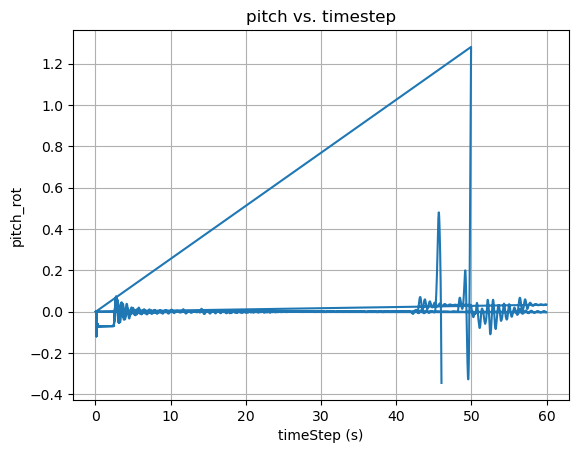

In [64]:
###plot pitch-rot over time
pitch_rot = np.array(bot_stateDF["pitch_rot"])
timestep = np.array(bot_stateDF["timestep"])
print("length of pitch-rot: {}".format(len(pitch_rot)))
print("length of timestep: {}".format(len(timestep)))
print(pitch_rot[len(pitch_rot) - 5:])

pitch_max = pitch_rot.max()
print("pitch-rot max: {}".format(pitch_max))
pitch_exp = 0.02
pitch_err = abs(pitch_max - pitch_exp)
print("yaw-error: {}".format(pitch_err))

#collect peaks from yaw
exp_error = 0.01
peaks, peak_props = find_peaks(pitch_rot, height=pitch_exp, distance=10)
print("No. of peaks found: {}".format(len(peaks)))
print(peak_props)

for i, peak in enumerate(peaks):
    print("peak-{}: {:.4f}".format(i, pitch_rot[peak]))

peak_bal_val = 0
peak_cnt = 0
peak_sum = 0
while peak_bal_val == 0 and peak_cnt < len(peaks):
    peak = peaks[peak_cnt]
    peak_val = pitch_rot[peak]
    peak_sum += peak_val
    print("peak-{}: {}".format(peak_cnt, peak_val))
    peak_err = abs(peak_val - yaw_exp)
    print("peak-error: {}".format(peak_err))
    if peak_err < exp_error:
        peak_sum += peak_val
        peak_bal_val = peak_val
    peak_cnt += 1
print("final peak val: {}".format(peak_bal_val))
time_indices = []
for i, val in enumerate(pitch_rot):
    if val == peak_bal_val:
        time_indices.append(i)

#set condition for when peak-cnt = 0 or no peak detected
if peak_cnt == 0:
    peak_avg = 500
else:
    peak_avg = peak_sum / peak_cnt

print("peak_sum: {}".format(peak_sum))
print("peak_cnt: {}".format(peak_cnt))
print("peak_avg: {}".format(peak_avg))
overshoot = abs(peak_avg - pitch_exp)
print("overshoot: {}".format(overshoot))

ovshot_exp = 0.02
adjst_time_exp = 1.0
if len(time_indices) > 0 and peak_bal_val != 0:
    adjst_time = timestep[0] * time_indices[0]
else:
    adjst_time = 9999
    
print("adjust-time: {}".format(adjst_time))
fitness = np.log10((adjst_time/adjst_time_exp) + 1) + np.log10((overshoot/ovshot_exp) + 1)
print("fitness: {:.4f}".format(fitness))


plt.plot(timestep, pitch_rot)
plt.title("pitch vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("pitch_rot")
plt.grid()
plt.show()

In [65]:
print("pitch-avg: {:.4f}".format(np.mean(pitch_rot)))

pitch-avg: 0.0001


length of diff-altitude: 13494
length of timestep: 13494
avg-diff altitude: 0.8201608733745561


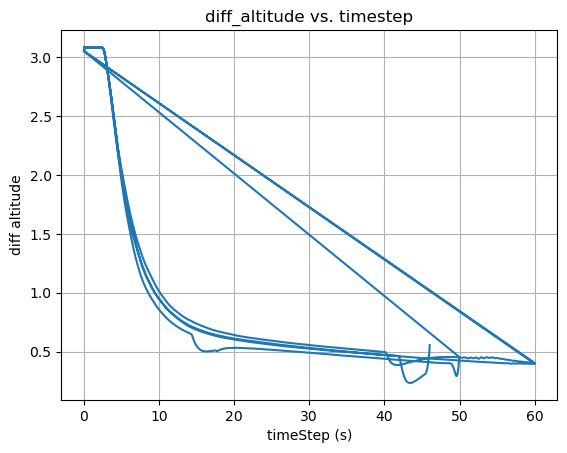

In [66]:
###plot diff-altitude over time
diff_altitude = np.array(PIDinputsDF["diff_altitude"])
timestep = np.array(bot_stateDF["timestep"])
print("length of diff-altitude: {}".format(len(diff_altitude)))
print("length of timestep: {}".format(len(timestep)))
print("avg-diff altitude: {}".format(np.mean(diff_altitude)))


plt.plot(timestep, diff_altitude)
plt.title("diff_altitude vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("diff altitude")
plt.grid()
plt.show()

length of clamp-diff-alt: 13494
len of timestep: 13494


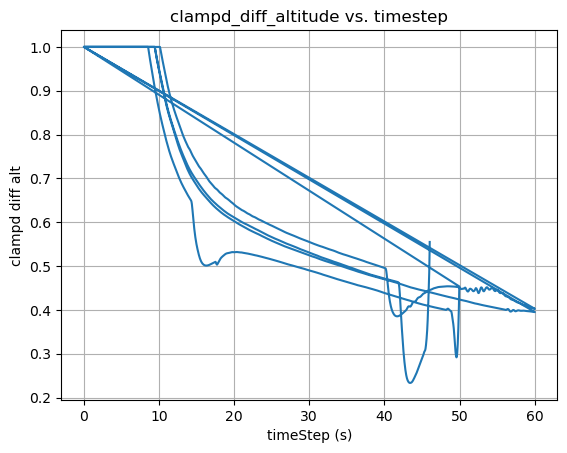

In [67]:
#plot clamped diff altitude
clampd_diff_altitude = np.array(PIDinputsDF["clampd_diff_altitude"])
timestep = np.array(bot_stateDF["timestep"])
print("length of clamp-diff-alt: {}".format(len(clampd_diff_altitude)))
print("len of timestep: {}".format(len(timestep)))

plt.plot(timestep, clampd_diff_altitude)
plt.title("clampd_diff_altitude vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("clampd diff alt")
plt.grid()
plt.show()

In [68]:
#print front_left motor overtime
#front_left_mtr = np.array(bot_stateDF['front_left_motor'])
front_left_mtr = np.array(PIDinputsDF['front_left_motor'])
timeStep = np.array(bot_stateDF['timestep'])
print("front left motor: {}".format(len(front_left_mtr)))
print("len of timestep: {}".format(len(timeStep)))

plt.plot(timeStep, front_left_mtr)
plt.title("Front Left motor over timeStep")
plt.xlabel("timeStep (s)")
plt.ylabel("Front Left motor")
plt.grid()
plt.show()

KeyError: 'front_left_motor'

In [ ]:
#print front_right motor overtime
#front_right_mtr = np.array(bot_stateDF['front_right_motor'])
front_right_mtr = np.array(PIDinputsDF['front_right_motor'])
timeStep = np.array(bot_stateDF['timestep'])
print("front right motor: {}".format(len(front_right_mtr)))
print("len of timestep: {}".format(len(timeStep)))

plt.plot(timeStep, front_right_mtr)
plt.title("Front Right motor over timeStep")
plt.xlabel("timeStep (s)")
plt.ylabel("Front Right motor")
plt.grid()
plt.show()

In [ ]:
#print rear_left motor overtime
#rear_left_mtr = np.array(bot_stateDF['rear_left_motor'])
rear_left_mtr = np.array(PIDinputsDF['rear_left_motor'])
timeStep = np.array(bot_stateDF['timestep'])
print("rear left motor: {}".format(len(rear_left_mtr)))
print("len of timestep: {}".format(len(timeStep)))

plt.plot(timeStep, rear_left_mtr)
plt.title("Rear Left motor over timeStep")
plt.xlabel("timeStep (s)")
plt.ylabel("Rear left motor")
plt.grid()
plt.show()

In [ ]:
#print rear_right motor overtime
#rear_right_mtr = np.array(bot_stateDF['rear_right_motor'])
rear_right_mtr = np.array(PIDinputsDF['rear_right_motor'])
timeStep = np.array(bot_stateDF['timestep'])
print("rear right motor: {}".format(len(rear_right_mtr)))
print("len of timestep: {}".format(len(timeStep)))

plt.plot(timeStep, rear_right_mtr)
plt.title("Rear right motor over timeStep")
plt.xlabel("timeStep (s)")
plt.ylabel("Rear right motor")
plt.grid()
plt.show()

In [ ]:
#fitness_arr = np.load(os.getcwd() + "\\fitness_list.npy")
fitness_arr = np.load(os.getcwd() + "\\archived\\archived_file_v11_throttleKd_200iters\\fitness_list.npy")
#fitness_arr = np.load(os.getcwd() + r"\archived\archived_file_v12_throttleKi_100iters\\fitness_list.npy")
#fitness_arr = np.load(os.getcwd() + r"\archived\archived_file_v10_throttleKp_100iters\\fitness_list.npy")
#fitness_arr = np.load(os.getcwd() + r"\archived\archived_file_v17_yposKd_100iters\\fitness_list.npy")
print(len(fitness_arr))
print(fitness_arr)
plt.plot(np.arange(60), fitness_arr)
plt.title("fitness vs. iters")
plt.xlabel("iteration")
plt.ylabel("fitness")
plt.grid()
plt.show()

In [ ]:
avg_arr = []
std_arr = []
for i, fitness in enumerate(fitness_arr):
    if i % 2 == 0:
        avg_arr.append(fitness)
    else:
        std_arr.append(fitness)
        
print(avg_arr)
print(len(avg_arr))
print(std_arr)
print(len(std_arr))

In [ ]:
fit_avg = np.array(avg_arr)
fit_std = np.array(std_arr)
#plt.plot(np.arange(50), fit_avg)
plt.title("fitness-avg vs. iters")
plt.xlabel("iteration")
plt.ylabel("fitness-avg")
plt.grid()
x = np.linspace(1, len(fit_avg), len(fit_avg)).astype(int)
plt.fill_between(x, fit_avg - fit_std, fit_avg + fit_std, alpha=0.5)
plt.errorbar(x, fit_avg, yerr=fit_std, color='black', ecolor='lightgray', elinewidth=3)
plt.title("Fitness  (mean, std)")
plt.xlabel("iterations")
plt.ylabel("Avg. Fitness over Particles")
plt.show()

In [ ]:
plt.plot(np.arange(30), std_arr)
plt.title("fitness-std vs. iters")
plt.xlabel("iteration")
plt.ylabel("fitness-std")
plt.grid()
plt.show()